## Load data



In [2]:
import pandas as pd

df = pd.read_csv('/content/openmeteo_combined_islamabad_20250101-20251104.csv')

## Initial data inspection


In [3]:
display(df.head())
df.info()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,timestamp,temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation,city,latitude,longitude
0,31.0,27.6,758.0,22.9,8.4,49.0,2025-01-01 00:00:00,7.2,73,955.6,6.4,333,0.0,Islamabad,33.6844,73.0479
1,29.0,25.4,1269.0,32.8,9.8,39.0,2025-01-01 01:00:00,6.7,75,956.4,5.4,358,0.0,Islamabad,33.6844,73.0479
2,34.8,30.9,1990.0,46.4,11.7,26.0,2025-01-01 02:00:00,6.9,71,956.5,5.6,356,0.0,Islamabad,33.6844,73.0479
3,44.0,39.9,2362.0,55.0,13.1,20.0,2025-01-01 03:00:00,7.9,67,957.2,6.4,342,0.0,Islamabad,33.6844,73.0479
4,49.8,46.6,2018.0,54.0,13.0,28.0,2025-01-01 04:00:00,11.1,57,958.2,8.4,325,0.0,Islamabad,33.6844,73.0479


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7392 entries, 0 to 7391
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pm10                  7392 non-null   float64
 1   pm2_5                 7392 non-null   float64
 2   carbon_monoxide       7392 non-null   float64
 3   nitrogen_dioxide      7392 non-null   float64
 4   sulphur_dioxide       7392 non-null   float64
 5   ozone                 7392 non-null   float64
 6   timestamp             7392 non-null   object 
 7   temperature_2m        7392 non-null   float64
 8   relative_humidity_2m  7392 non-null   int64  
 9   surface_pressure      7392 non-null   float64
 10  wind_speed_10m        7392 non-null   float64
 11  wind_direction_10m    7392 non-null   int64  
 12  precipitation         7392 non-null   float64
 13  city                  7392 non-null   object 
 14  latitude              7392 non-null   float64
 15  longitude            

## Check for missing values



In [4]:
missing_values = df.isnull().sum()
display(missing_values)

,0
pm10,0
pm2_5,0
carbon_monoxide,0
nitrogen_dioxide,0
sulphur_dioxide,0
ozone,0
timestamp,0
temperature_2m,0
relative_humidity_2m,0
surface_pressure,0


## Summary statistics



In [5]:
display(df.describe())

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation,latitude,longitude
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7.392000e+03,7.392000e+03
mean,48.552394,35.357089,894.339827,36.718926,11.286282,86.939529,23.837405,54.719697,948.961945,8.180804,174.813582,0.144399,3.368440e+01,7.304790e+01
std,33.558907,18.699255,636.638547,31.596253,6.395550,58.475317,7.631437,21.889111,5.336411,4.796443,115.168009,0.783980,1.598829e-12,4.306180e-12
min,3.200000,3.200000,14.000000,0.000000,1.300000,0.000000,5.100000,8.000000,936.000000,0.000000,1.000000,0.000000,3.368440e+01,7.304790e+01
25%,27.600000,21.700000,452.000000,11.200000,6.500000,39.000000,18.600000,37.000000,944.700000,4.700000,86.000000,0.000000,3.368440e+01,7.304790e+01
50%,40.300000,31.300000,663.000000,26.500000,10.000000,79.000000,25.100000,55.000000,948.800000,7.400000,128.000000,0.000000,3.368440e+01,7.304790e+01
75%,60.100000,45.925000,1145.000000,53.825000,14.600000,133.000000,29.200000,72.000000,953.300000,11.125000,301.000000,0.000000,3.368440e+01,7.304790e+01
max,501.100000,137.800000,4115.000000,151.500000,47.200000,237.000000,44.500000,99.000000,963.600000,33.100000,360.000000,14.400000,3.368440e+01,7.304790e+01


## Explore categorical data


In [6]:
categorical_columns = df.select_dtypes(include='object').columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"Value counts for column: {col}")
        display(df[col].value_counts())
else:
    print("No categorical columns found.")


Value counts for column: timestamp


,count
timestamp,
2025-11-04 07:00:00,1
2025-11-04 06:00:00,1
2025-11-04 05:00:00,1
2025-11-04 04:00:00,1
2025-11-04 03:00:00,1
...,...
2025-01-01 04:00:00,1
2025-01-01 03:00:00,1
2025-01-01 02:00:00,1


Value counts for column: city


,count
city,
Islamabad,7392


## Visualize data distribution




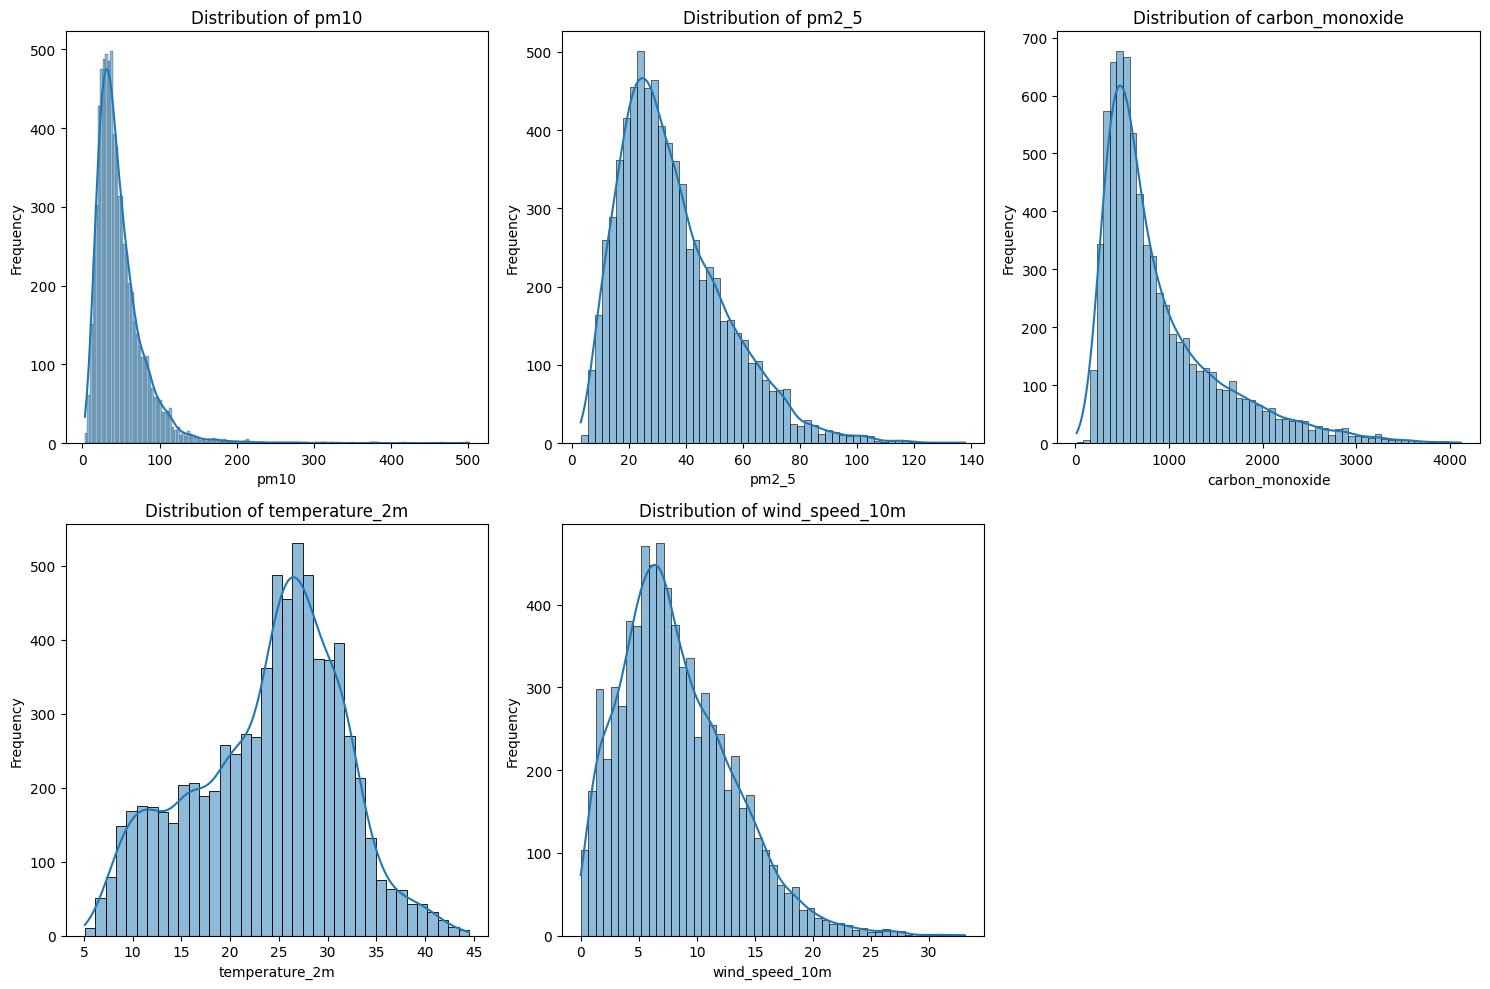

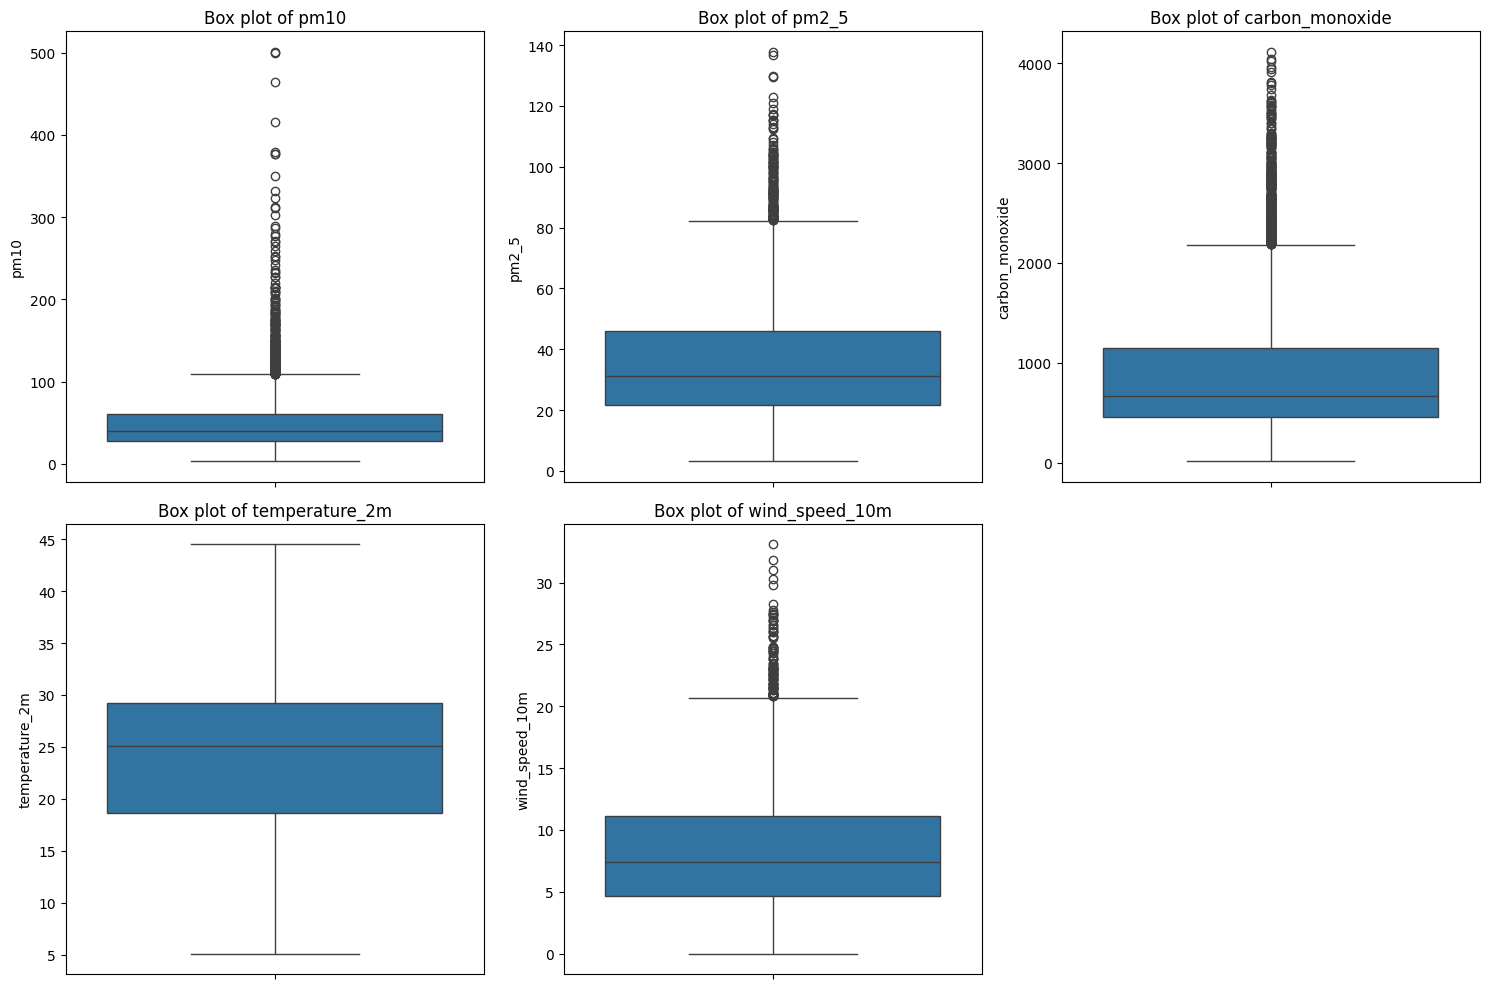

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['pm10', 'pm2_5', 'carbon_monoxide', 'temperature_2m', 'wind_speed_10m']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Analyze time series trends


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

time_series_cols = ['temperature_2m', 'pm2_5', 'wind_speed_10m']

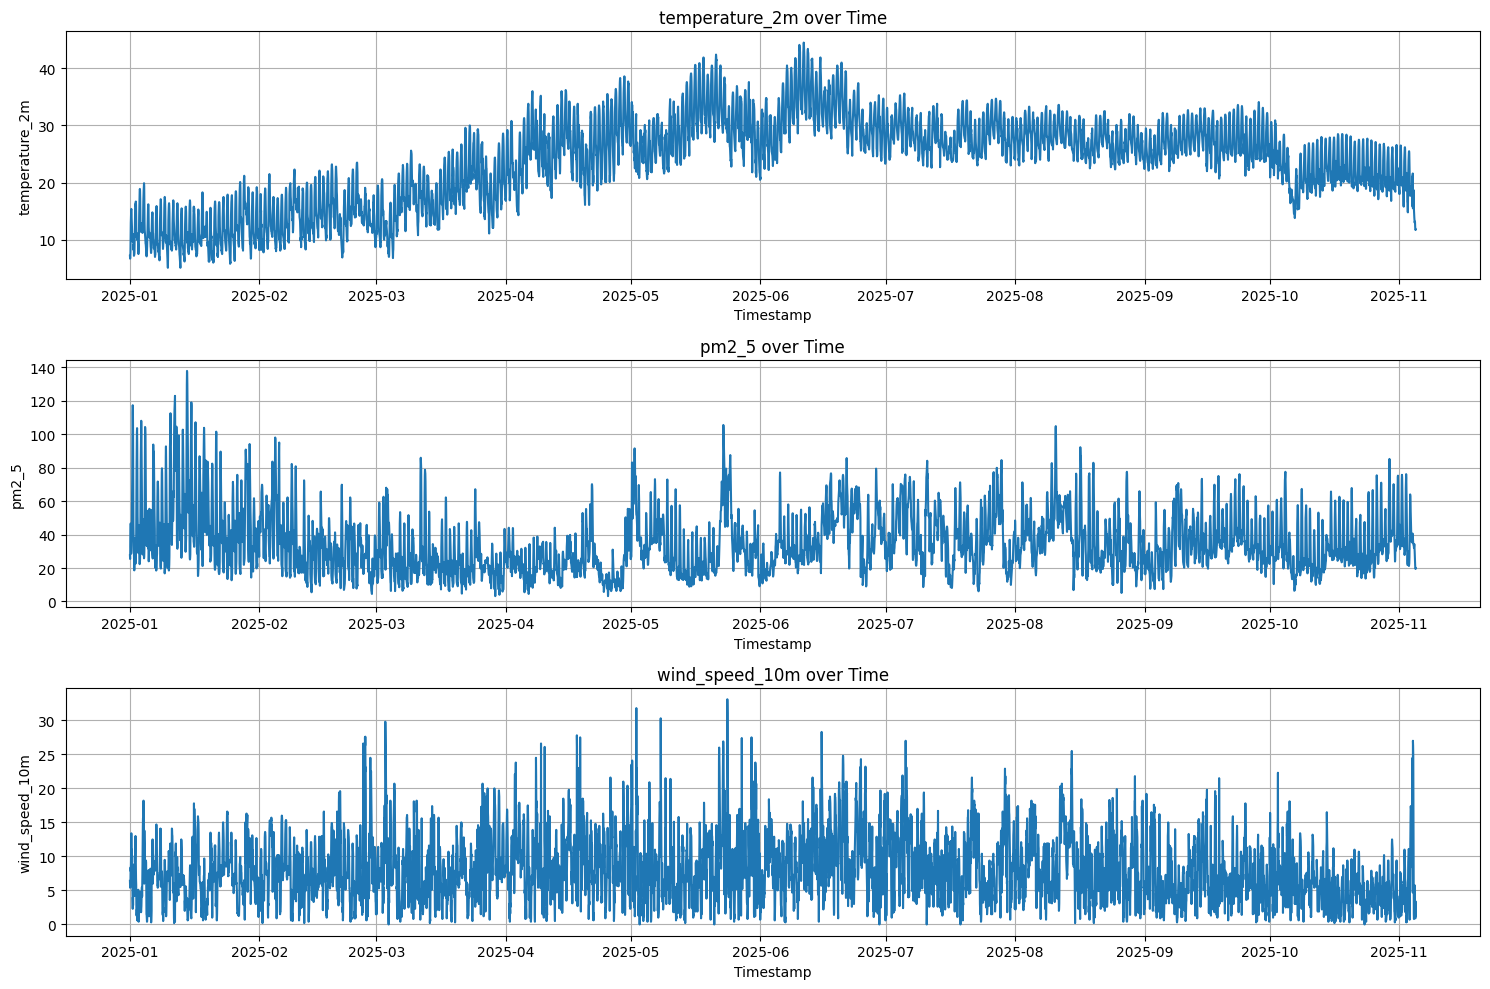

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(time_series_cols):
    plt.subplot(len(time_series_cols), 1, i + 1)
    plt.plot(df.index, df[col])
    plt.title(f'{col} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

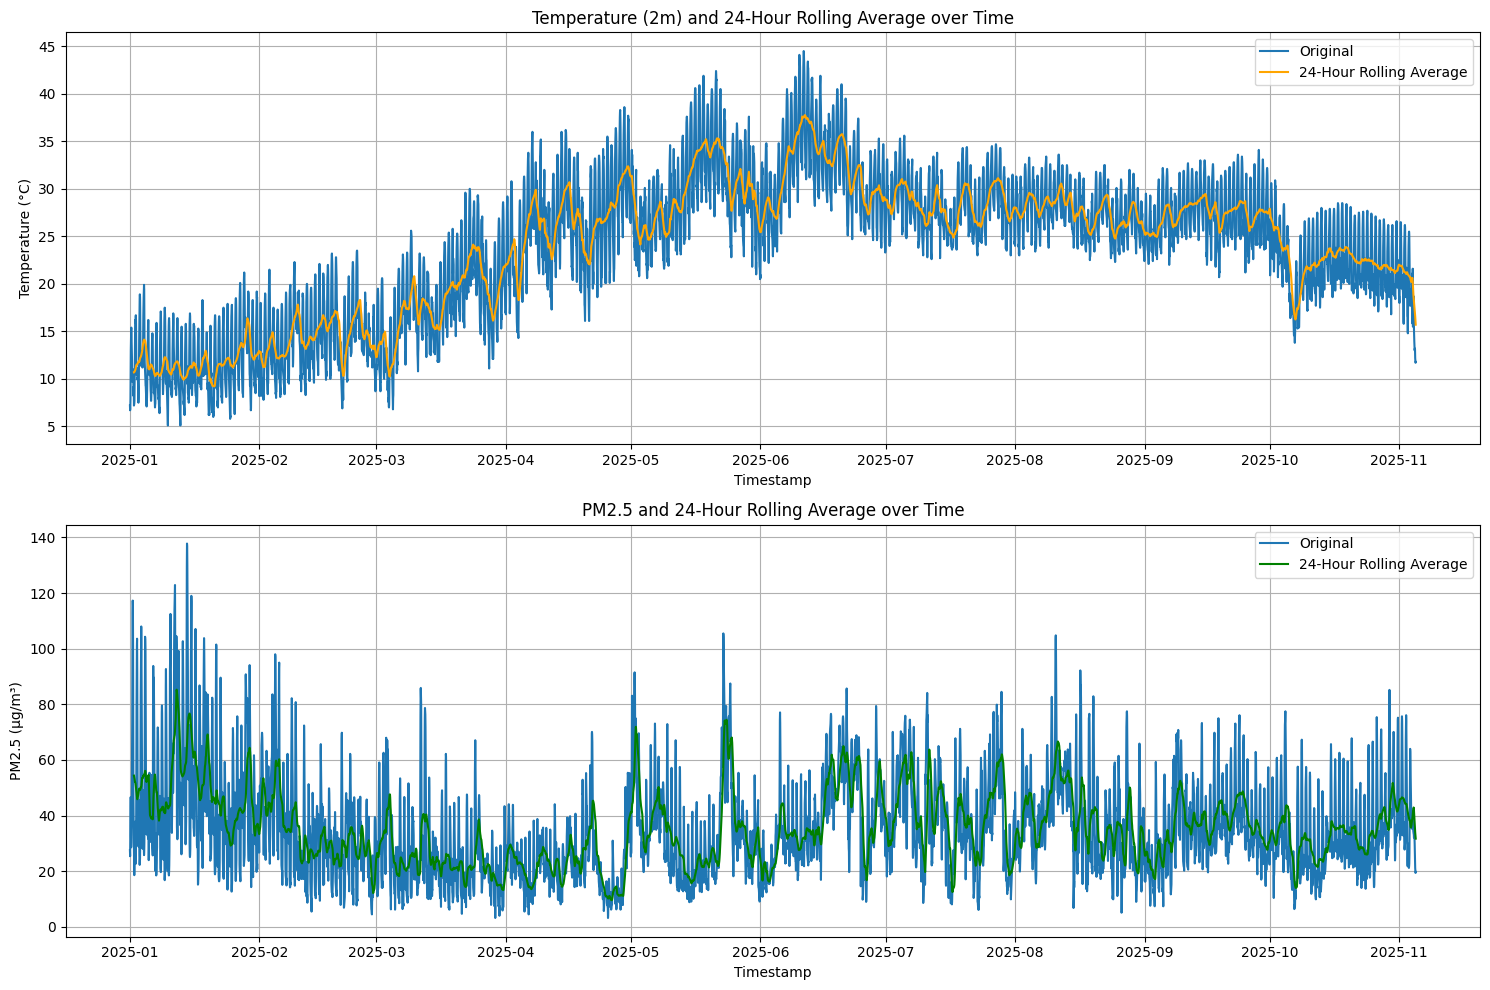

In [10]:
plt.figure(figsize=(15, 10))

# Rolling average for temperature_2m (24-hour window)
plt.subplot(2, 1, 1)
plt.plot(df.index, df['temperature_2m'], label='Original')
plt.plot(df.index, df['temperature_2m'].rolling(window=24).mean(), label='24-Hour Rolling Average', color='orange')
plt.title('Temperature (2m) and 24-Hour Rolling Average over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Rolling average for pm2_5 (24-hour window)
plt.subplot(2, 1, 2)
plt.plot(df.index, df['pm2_5'], label='Original')
plt.plot(df.index, df['pm2_5'].rolling(window=24).mean(), label='24-Hour Rolling Average', color='green')
plt.title('PM2.5 and 24-Hour Rolling Average over Time')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Identify correlations



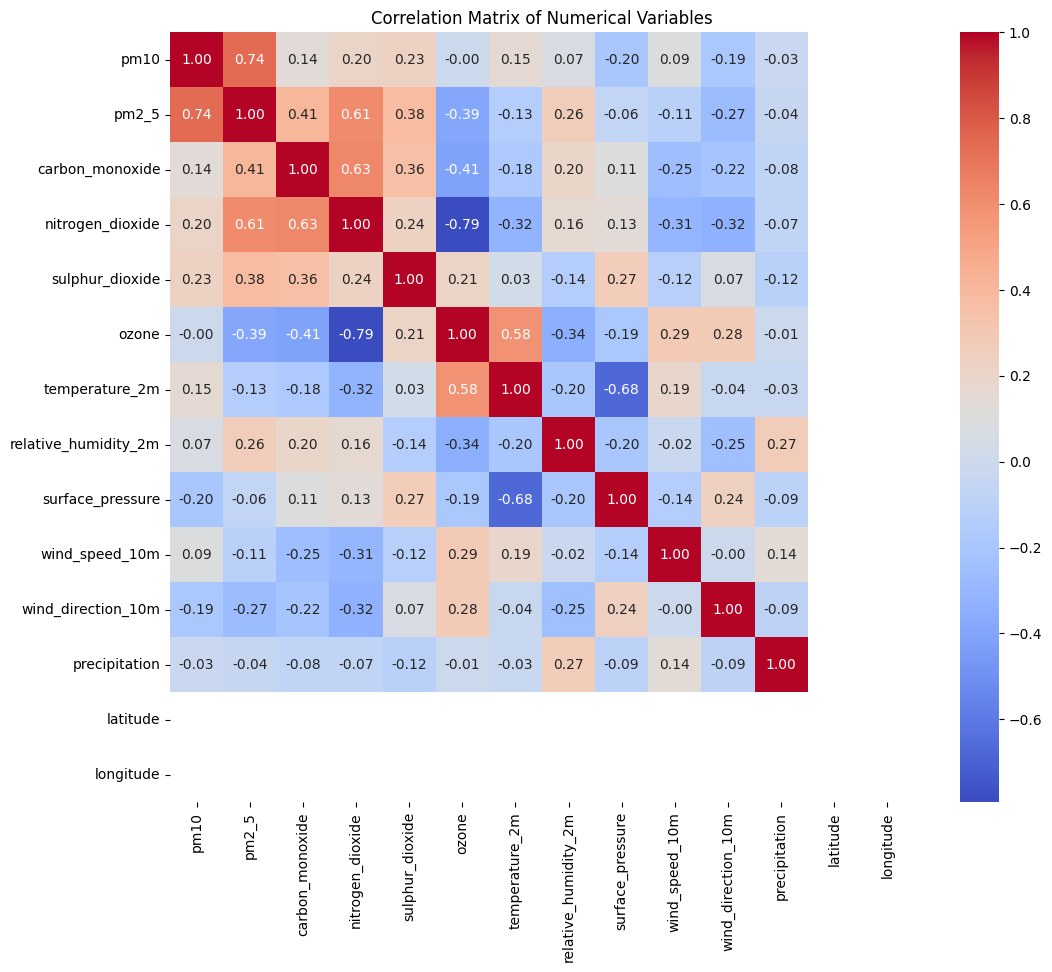

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Explore specific trends



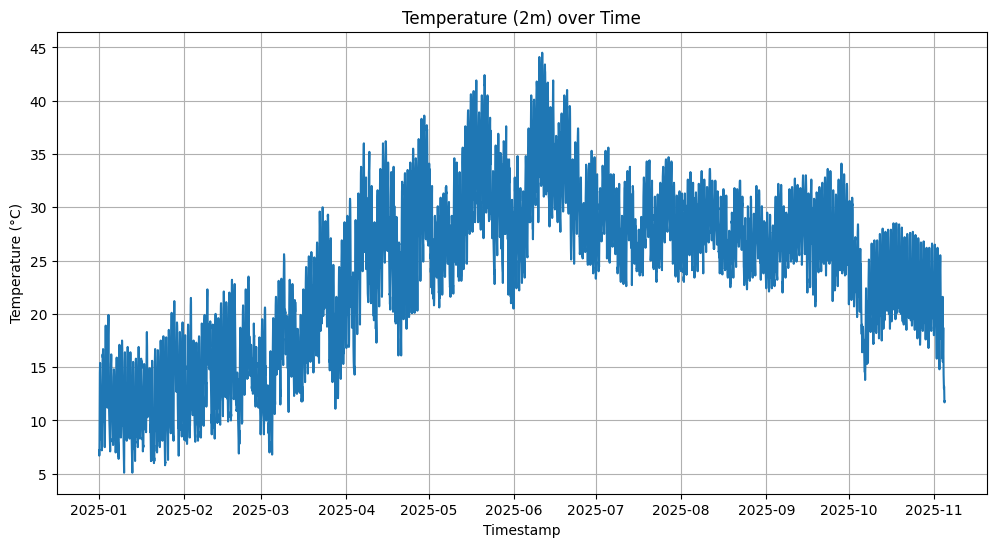

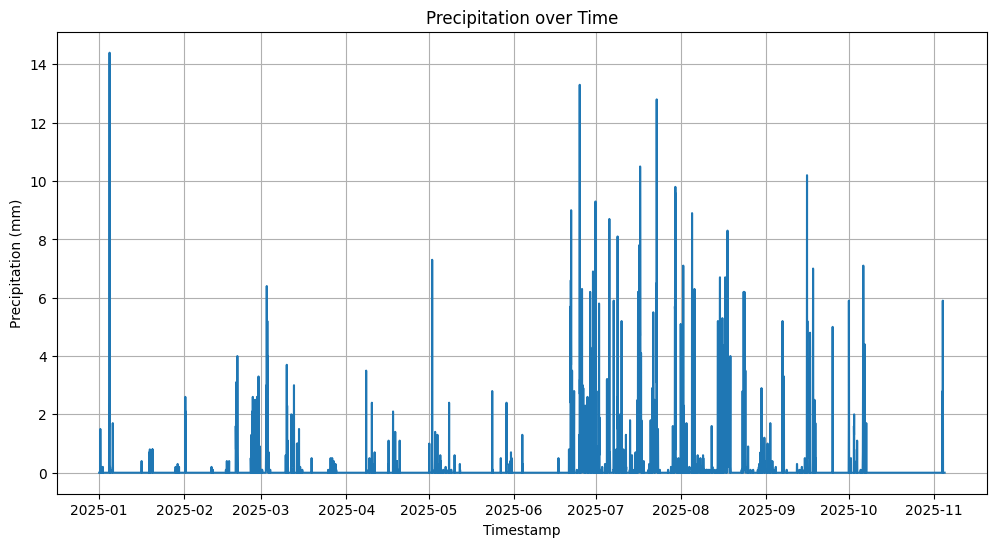

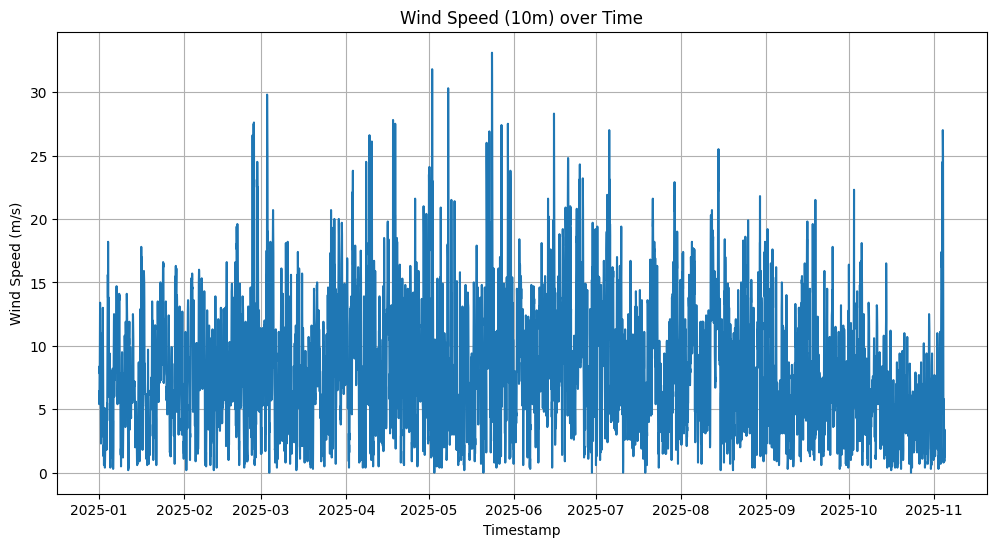

In [12]:
import matplotlib.pyplot as plt

# Plot temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temperature_2m'])
plt.title('Temperature (2m) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['precipitation'])
plt.title('Precipitation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

# Plot wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['wind_speed_10m'])
plt.title('Wind Speed (10m) over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

## Summarize findings



## Summary:

### Data Analysis Key Findings

*   The dataset contains 7392 entries and 16 columns covering various air quality and weather parameters, with no missing values.
*   The data is specific to the city of Islamabad.
*   The distribution of numerical variables like PM10, PM2.5, Carbon Monoxide, temperature, and wind speed were visualized using histograms and box plots, providing insights into their central tendency, spread, and potential outliers.
*   Time series analysis showed clear temporal trends, including a seasonal pattern in temperature and fluctuations in PM2.5 levels and wind speed over the observed period.
*   Calculating 24-hour rolling averages for temperature and PM2.5 smoothed out short-term variations, highlighting longer-term trends.
*   A correlation matrix revealed relationships between the numerical variables, indicating positive or negative correlations.


